In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils # 원 핫 인코딩
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense,Activation #레이어
import numpy as np
np.random.seed(3)

In [46]:
# 데이터 셋 준비하기
# 훈련용 세트, 검증용 세트 분리
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [47]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

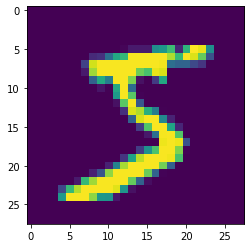

In [48]:
plt.imshow(X_train[0])

In [49]:
#훈련셋과 검증셋 분리(X_train,Y_train을 검증셋과 훈련셋으로 분리)
X_val=X_train[50000:]
Y_val=Y_train[50000:]
X_train=X_train[:50000]
Y_train=Y_train[:50000]

In [50]:
# 훈련셋-model이 학습할 때 사용model이 학습할 때 사용
X_train.shape, Y_train.shape

((50000, 28, 28), (50000,))

In [51]:
# 검증셋
len(X_val),len(Y_val)

(10000, 10000)

In [52]:
# 훈련셋
len(X_test),len(Y_test)

(10000, 10000)

In [53]:
# normalrize 하기 위해 색상값으로 나누기
X_train = X_train.reshape(50000,784).astype('float32')/255.0
X_val=X_val.reshape(10000,784).astype('float32')/255.0
X_test=X_val.reshape(10000,784).astype('float32')/255.0

In [54]:
X_train.shape, X_val.shape,X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [55]:
# 훈련셋과 거ㅁ증셋 700개, 300씩만 가져옴
train_rand_idxs=np.random.choice(50000,700)
val_rand_idxs=np.random.choice(10000,300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]



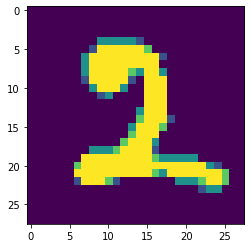

In [56]:
plt.imshow(X_train[0].reshape(28,28))

In [57]:
Y_train[0]

2

In [58]:
Y_train.shape,Y_val.shape,Y_test.shape

((700,), (300,), (10000,))

In [59]:
#원 핫 인코딩 = 라벨링 전환
# 0 =>1 0 0 0 0 0 0 0 0 0
# 3=> 0 0 0 1 0 0 0 0 0 0 
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
#categorical은 ydata가 숫자일때만 이용가능

In [60]:
Y_train.shape,Y_val.shape,Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [12]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# 4. 모델 학습시키기+검증하기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val))

NameError: name 'X_train' is not defined

In [62]:
# 5. 모델학습과정 표시하고 평가하기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

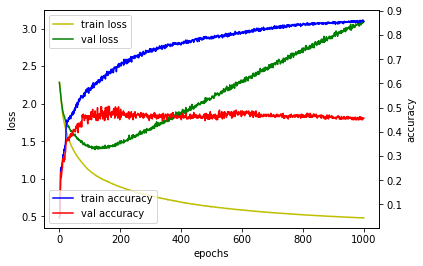

In [63]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [64]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 0s 909us/step - loss: 5.8039 - accuracy: 0.1028


In [65]:
print("loss :", loss_and_metrics[0])
print("accuracy :", loss_and_metrics[1])

loss : 5.803893089294434
accuracy : 0.10279999673366547


In [66]:
# 6. 모델 저장 및 로드하기
model.save("model/mnist.h5")

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [68]:
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')

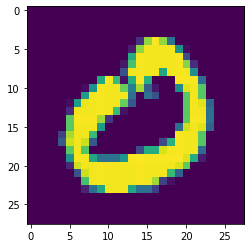

In [78]:
plt.imshow(X_val[0].reshape(28,28))

In [75]:
result = model2.predict(X_val[0].reshape(1,784))
result.argmax()

0

In [76]:
Y_val[0].argmax()

0

In [74]:
model2.predict_classes(X_val[0].reshape(1,784))

array([0], dtype=int64)

In [ ]:
# https://teddylee777.github.io/tensorflow/Python%EA%B3%BC-Tensorflow%EB%A1%9C-Mnist%EA%B8%80%EC%9E%90%EC%9D%B8%EC%8B%9D-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0

# 콜백함수

In [62]:
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss = [] 
        self.val_loss =[]
        self.train_acc=[]
        self.val_acc=[]
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_acc'))
        if self.epoch % 10 ==0:
            print("epoch:{}, loss:{}, val_loss:{}".format(self.epoch,logs.get('loss').logs.get('val_loss')))
        self.epoch += 1
            
# 데이터 셋 준비하기
# 훈련용 세트, 검증용 세트 분리
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()  

#훈련셋과 검증셋 분리(X_train,Y_train을 검증셋과 훈련셋으로 분리)
X_val=X_train[50000:]
Y_val=Y_train[50000:]
X_train=X_train[:50000]
Y_train=Y_train[:50000]

# normalrize 하기 위해 색상값으로 나누기
X_train = X_train.reshape(50000,784).astype('float32')/255.0
X_val=X_val.reshape(10000,784).astype('float32')/255.0
X_test=X_val.reshape(10000,784).astype('float32')/255.0

# 훈련셋과 검증셋 700개, 300씩만 가져옴
train_rand_idxs=np.random.choice(50000,700)
val_rand_idxs=np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

#원 핫 인코딩 = 라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

In [24]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# 4. 모델 학습시키기+검증하기
custom_hist=CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val),verbose=0,
                callbacks=[custom_hist])

AttributeError: 'float' object has no attribute 'logs'

# Early Stopping
- val loss값이 불어나면 epoch를 다 수행하지 않고 조기 종료

In [6]:
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss = [] 
        self.val_loss =[]
        self.train_acc=[]
        self.val_acc=[]
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_acc'))
        if self.epoch % 10 ==0:
            print("epoch:{}, loss:{}, val_loss:{}".format(self.epoch,logs.get('loss').logs.get('val_loss')))
        self.epoch += 1
            
# 데이터 셋 준비하기
# 훈련용 세트, 검증용 세트 분리
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()  

#훈련셋과 검증셋 분리(X_train,Y_train을 검증셋과 훈련셋으로 분리)
X_val=X_train[50000:]
Y_val=Y_train[50000:]
X_train=X_train[:50000]
Y_train=Y_train[:50000]

# normalrize 하기 위해 색상값으로 나누기
X_train = X_train.reshape(50000,784).astype('float32')/255.0
X_val=X_val.reshape(10000,784).astype('float32')/255.0
X_test=X_val.reshape(10000,784).astype('float32')/255.0

# 훈련셋과 검증셋 700개, 300씩만 가져옴
train_rand_idxs=np.random.choice(50000,700)
val_rand_idxs=np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

#원 핫 인코딩 = 라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=30) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/1000
70/70 [==============================] - 1s 4ms/step - loss: 2.3080 - accuracy: 0.1021 - val_loss: 2.3102 - val_accuracy: 0.0867
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2901 - accuracy: 0.1161 - val_loss: 2.2980 - val_accuracy: 0.1033
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2403 - accuracy: 0.1298 - val_loss: 2.1798 - val_accuracy: 0.1700
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1032 - accuracy: 0.1984 - val_loss: 2.0976 - val_accuracy: 0.2600
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0370 - accuracy: 0.2805 - val_loss: 2.0263 - val_accuracy: 0.2700
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9466 - accuracy: 0.2987 - val_loss: 1.9806 - val_accuracy: 0.3100
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9053 - accuracy: 0.3495 - val_loss: 1.9387 - val_accuracy: 0.2933
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 1.3222 - accuracy: 0.5165 - val_loss: 1.4948 - val_accuracy: 0.4633
Epoch 59/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2917 - accuracy: 0.5364 - val_loss: 1.4931 - val_accuracy: 0.4600
Epoch 60/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2811 - accuracy: 0.5234 - val_loss: 1.4919 - val_accuracy: 0.4667
Epoch 61/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3342 - accuracy: 0.4949 - val_loss: 1.4902 - val_accuracy: 0.4700
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3008 - accuracy: 0.5312 - val_loss: 1.4866 - val_accuracy: 0.4767
Epoch 63/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2649 - accuracy: 0.5321 - val_loss: 1.4843 - val_accuracy: 0.4667
Epoch 64/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3196 - accuracy: 0.5345 - val_loss: 1.4775 - val_accuracy: 0.4800
Epoch 65/1000

70/70 [==============================] - 0s 1ms/step - loss: 1.1316 - accuracy: 0.5708 - val_loss: 1.4305 - val_accuracy: 0.4900
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1088 - accuracy: 0.5824 - val_loss: 1.4221 - val_accuracy: 0.4933
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1459 - accuracy: 0.5598 - val_loss: 1.4258 - val_accuracy: 0.4900
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0842 - accuracy: 0.5966 - val_loss: 1.4268 - val_accuracy: 0.4967
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0762 - accuracy: 0.6047 - val_loss: 1.4196 - val_accuracy: 0.4933
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1504 - accuracy: 0.5699 - val_loss: 1.4270 - val_accuracy: 0.4967
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0996 - accuracy: 0.6023 - val_loss: 1.4276 - val_accuracy: 0.4967
Epoch 1

In [19]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=30) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/1000
70/70 [==============================] - 1s 5ms/step - loss: 2.3045 - accuracy: 0.1258 - val_loss: 2.2768 - val_accuracy: 0.1267
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2240 - accuracy: 0.1606 - val_loss: 2.2239 - val_accuracy: 0.1700
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1499 - accuracy: 0.2138 - val_loss: 2.1827 - val_accuracy: 0.2333
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1139 - accuracy: 0.2344 - val_loss: 2.1333 - val_accuracy: 0.2500
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0447 - accuracy: 0.2645 - val_loss: 2.0892 - val_accuracy: 0.2667
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0197 - accuracy: 0.2975 - val_loss: 2.0476 - val_accuracy: 0.2767
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9503 - accuracy: 0.3281 - val_loss: 2.0093 - val_accuracy: 0.2900
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 1.2718 - accuracy: 0.5525 - val_loss: 1.4217 - val_accuracy: 0.4767
Epoch 59/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1973 - accuracy: 0.5449 - val_loss: 1.4112 - val_accuracy: 0.4800
Epoch 60/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1971 - accuracy: 0.5452 - val_loss: 1.4060 - val_accuracy: 0.4700
Epoch 61/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1989 - accuracy: 0.5563 - val_loss: 1.4041 - val_accuracy: 0.4800
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2314 - accuracy: 0.5251 - val_loss: 1.4066 - val_accuracy: 0.4667
Epoch 63/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2217 - accuracy: 0.5305 - val_loss: 1.4060 - val_accuracy: 0.4833
Epoch 64/1000
70/70 [==============================] - ETA: 0s - loss: 1.3041 - accuracy: 0.60 - 0s 1ms/step - loss: 1.1921 - accuracy: 0.5536 - val_loss: 1

Epoch 115/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0249 - accuracy: 0.6251 - val_loss: 1.3608 - val_accuracy: 0.5000
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0275 - accuracy: 0.5851 - val_loss: 1.3597 - val_accuracy: 0.5000
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0332 - accuracy: 0.5942 - val_loss: 1.3562 - val_accuracy: 0.5067
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0411 - accuracy: 0.6020 - val_loss: 1.3694 - val_accuracy: 0.5000
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0163 - accuracy: 0.6153 - val_loss: 1.3602 - val_accuracy: 0.5067
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0676 - accuracy: 0.6033 - val_loss: 1.3701 - val_accuracy: 0.5067
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0050 - accuracy: 0.6116 - val_loss: 1.3640 - val_accuracy:

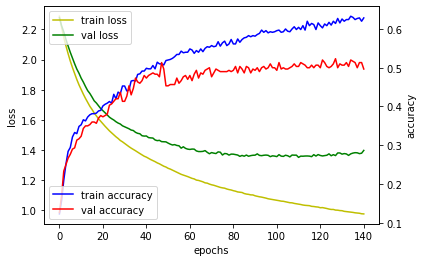

In [20]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

#너무 조기종료되었을 가능성도있다.

In [39]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics :', loss_and_metrics)

313/313 [==============================] - 0s 873us/step - loss: 1.4212 - accuracy: 0.4987

loss_and_metrics : [1.421190619468689, 0.49869999289512634]


In [40]:
# 7. 모델 사용하기
idx=np.random.choice(X_test.shape[0],5)

In [41]:
xhat=X_test[idx]
xhat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
np.argmax(Y_test[idx],axis=1) #실제값

array([4, 1, 7, 6, 8], dtype=int64)

In [43]:
yhat=model.predict(xhat) 
yhat=np.argmax(yhat,axis=1)
yhat

array([4, 1, 0, 6, 8], dtype=int64)

In [44]:
for i in range(5):
    print(i,"번째 실제값 :", np.argmax(Y_test[idx[i]]), "\t예측값 :",
         yhat[i])

0 번째 실제값 : 4 	예측값 : 4
1 번째 실제값 : 1 	예측값 : 1
2 번째 실제값 : 7 	예측값 : 0
3 번째 실제값 : 6 	예측값 : 6
4 번째 실제값 : 8 	예측값 : 8


In [45]:
# 8. 모델 저장하기
model.save('model.mnist.h5')

In [46]:
# 9. 모델 재사용하기
from tensorflow.keras.models import load_model
model2 = load_model("model/mnist.h5")
model2.predict_classes(xhat)

array([4, 1, 8, 1, 9], dtype=int64)

# 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어 층 잘 쌓기 
- 활성화 함수 : relu(은닉층은 주로 relu. elu도 가끔 사용)
    - output lay에서는 sigmoid(이진분류), softmax(다중분류
- optimizer, epoch조정

In [ ]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 수를 늘리기 위해 세트 수 줄이는 걸 없앤다
#train_rand_idxs = np.random.choice(50000,700)
#val_rand_idxs   = np.random.choice(10000,300)
#X_train = X_train[train_rand_idxs]
#Y_train = Y_train[train_rand_idxs]
#X_val = X_val[val_rand_idxs]
#Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=512, input_dim=784, activation="relu"))
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=20) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=300, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])